<a href="https://colab.research.google.com/github/Waynel65/deep-learning-project/blob/main/CNNWorkshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torchvision.datasets as datasets
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
train = datasets.MNIST('./data', download=True, transform=None, train=True)
test = datasets.MNIST('./data', download=True, transform=None, train=False)

train_x = train.train_data.reshape(60000, 28, 28, 1).type(torch.FloatTensor).cuda()
train_y = train.train_labels.type(torch.LongTensor).cuda()

test_x = test.test_data.reshape(10000, 28, 28, 1).type(torch.FloatTensor).cuda()
test_y = test.test_labels.type(torch.LongTensor).cuda()

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.conv = nn.Conv2d(28, 9, stride=1, padding=1, kernel_size=3).cuda()
    self.dense = nn.Linear(9*28, 10).cuda()
    
  def forward(self, x):
    a1 = F.relu(self.conv(x))
    a1 = a1.view(-1, 9*28)
    return F.softmax(self.dense(a1))

In [ ]:
net = Network()
val = net(train_x[0:1])
print(val)

tensor([[1.7223e-05, 7.8256e-04, 3.3067e-10, 1.4094e-04, 2.0464e-04, 1.0378e-07,
         6.7499e-08, 2.6815e-10, 9.9885e-01, 7.4112e-13]], device='cuda:0',
       grad_fn=<SoftmaxBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


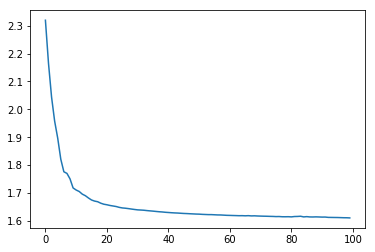

In [ ]:
losses = []
lossfunc = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)
for i in range(100):
  optimizer.zero_grad()
  output = net(train_x)
  loss = lossfunc(output, train_y)
  loss.backward()
  losses.append(loss)
  optimizer.step()
plt.plot(losses)
plt.show()
plt.close()

In [ ]:
x = test_x[0:1]
label = net(x).cpu().detach().numpy()
print(np.argmax(label))
test[0][0]

7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


In [ ]:
np.argmax()